<a href="https://colab.research.google.com/github/truffleToast/DeepLearning/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt #그래프 그리기
from sklearn.linear_model import LinearRegression #선형분류
import statsmodels.graphics.tsaplots as sgt #  acf, pcaf 그리기
import seaborn as sns #heatmap 사용을 위해 import
import xgboost as xgb #xgb
import lightgbm as lgb #lgbm3
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #RandomForest, GradinetBoosting
from sklearn.multioutput import MultiOutputRegressor # 다항 회귀
from sklearn.preprocessing import RobustScaler # 로버스트 스케일러
from sklearn.model_selection import KFold # Kfold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #R2_score # mse, mae
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deepLearning/Kaggle/data/continuous_factory_process.csv", index_col ="time_stamp")
raw_sub=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deepLearning/Kaggle/data/submission_data.csv", index_col="time_stamp")

In [ ]:
data = raw_df.drop(columns=[col for col in raw_df.columns if col.endswith('.Setpoint')]) #setPoint제거
sub = raw_sub.drop(columns=[col for col in raw_df.columns if col.endswith('.Setpoint')]) #setPoint제거

# 모델 1

In [ ]:
X1 = data.iloc[:,:41]
Rx1 = sub.iloc[:,:41]
y1 = data.iloc[:,41:56]
X2 = data.iloc[:,56:70]
Rx2 =sub.iloc[:,56:70]
y2 = data.iloc[:,70:]


X1_selected = data[['Machine1.ExitZoneTemperature.C.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine3.MotorRPM.C.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'FirstStage.CombinerOperation.Temperature1.U.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property2',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'Machine3.RawMaterial.Property4',
 'Machine3.RawMaterial.Property2',
 'FirstStage.CombinerOperation.Temperature2.U.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine3.RawMaterial.Property3',
 'Machine3.MaterialTemperature.U.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine3.RawMaterial.Property1',
 'Machine1.MaterialPressure.U.Actual']
]

Sub1_selected =sub[['Machine1.ExitZoneTemperature.C.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine3.MotorRPM.C.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'FirstStage.CombinerOperation.Temperature1.U.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property2',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'Machine3.RawMaterial.Property4',
 'Machine3.RawMaterial.Property2',
 'FirstStage.CombinerOperation.Temperature2.U.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine3.RawMaterial.Property3',
 'Machine3.MaterialTemperature.U.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine3.RawMaterial.Property1',
 'Machine1.MaterialPressure.U.Actual']]


X2_selected = data[['Machine5.Temperature3.C.Actual',
 'Machine5.Temperature6.C.Actual',
'Machine4.ExitTemperature.U.Actual',
'Machine5.ExitTemperature.U.Actual',
'Machine4.Temperature1.C.Actual',
'Machine4.Pressure.C.Actual',
'Machine4.Temperature3.C.Actual',
'Machine5.Temperature4.C.Actual',
'Machine4.Temperature2.C.Actual',
'Machine5.Temperature5.C.Actual',
'Machine4.Temperature5.C.Actual',
'Machine5.Temperature1.C.Actual',
'Machine5.Temperature2.C.Actual']]


Sub2_selected = sub[['Machine5.Temperature3.C.Actual',
 'Machine5.Temperature6.C.Actual',
'Machine4.ExitTemperature.U.Actual',
'Machine5.ExitTemperature.U.Actual',
'Machine4.Temperature1.C.Actual',
'Machine4.Pressure.C.Actual',
'Machine4.Temperature3.C.Actual',
'Machine5.Temperature4.C.Actual',
'Machine4.Temperature2.C.Actual',
'Machine5.Temperature5.C.Actual',
'Machine4.Temperature5.C.Actual',
'Machine5.Temperature1.C.Actual',
'Machine5.Temperature2.C.Actual']]

'''
Stage1Featues =
['Machine1.ExitZoneTemperature.C.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine3.MotorRPM.C.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'FirstStage.CombinerOperation.Temperature1.U.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property2',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'Machine3.RawMaterial.Property4',
 'Machine3.RawMaterial.Property2',
 'FirstStage.CombinerOperation.Temperature2.U.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine3.RawMaterial.Property3',
 'Machine3.MaterialTemperature.U.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine3.RawMaterial.Property1',
 'Machine1.MaterialPressure.U.Actual']

 Stage2Features= ['Machine5.Temperature3.C.Actual',
 'Machine5.Temperature6.C.Actual',
'Machine4.ExitTemperature.U.Actual',
'Machine5.ExitTemperature.U.Actual',
'Machine4.Temperature1.C.Actual',
'Machine4.Pressure.C.Actual',
'Machine4.Temperature3.C.Actual',
'Machine5.Temperature4.C.Actual',
'Machine4.Temperature2.C.Actual',
'Machine5.Temperature5.C.Actual',
'Machine4.Temperature5.C.Actual',
'Machine5.Temperature1.C.Actual',
'Machine5.Temperature2.C.Actual']
'''


"\nStage1Featues =\n['Machine1.ExitZoneTemperature.C.Actual',\n 'AmbientConditions.AmbientTemperature.U.Actual',\n 'Machine1.MotorRPM.C.Actual',\n 'Machine3.MotorRPM.C.Actual',\n 'Machine1.MaterialTemperature.U.Actual',\n 'FirstStage.CombinerOperation.Temperature1.U.Actual',\n 'Machine2.RawMaterial.Property1',\n 'Machine2.RawMaterial.Property4',\n 'Machine2.RawMaterial.Property3',\n 'Machine2.RawMaterial.Property2',\n 'AmbientConditions.AmbientHumidity.U.Actual',\n 'Machine3.RawMaterial.Property4',\n 'Machine3.RawMaterial.Property2',\n 'FirstStage.CombinerOperation.Temperature2.U.Actual',\n 'Machine2.MotorAmperage.U.Actual',\n 'Machine3.RawMaterial.Property3',\n 'Machine3.MaterialTemperature.U.Actual',\n 'Machine2.MaterialPressure.U.Actual',\n 'Machine2.MaterialTemperature.U.Actual',\n 'Machine3.RawMaterial.Property1',\n 'Machine1.MaterialPressure.U.Actual']\n\n Stage2Features= ['Machine5.Temperature3.C.Actual',\n 'Machine5.Temperature6.C.Actual',\n'Machine4.ExitTemperature.U.Actual',\

# 평균 내서 편하게 상관관계

In [ ]:
mean_y1 = y1.mean(axis =1)
py1= pd.DataFrame(mean_y1)
py1.columns = ['Mean']
py1

,Mean
time_stamp,
2019-03-06 10:52:33,8.279333
2019-03-06 10:52:38,6.619333
2019-03-06 10:52:40,8.208667
2019-03-06 10:52:42,5.537333
2019-03-06 10:52:43,3.654667
...,...
2019-03-06 14:47:13,9.058000
2019-03-06 14:47:16,8.812667
2019-03-06 14:47:17,8.812667


In [ ]:
mean_y2 = y2.mean(axis =1)
py2= pd.DataFrame(mean_y2)
py2.columns = ['Mean']
py2

,Mean
time_stamp,
2019-03-06 10:52:33,0.000000
2019-03-06 10:52:38,0.000000
2019-03-06 10:52:40,0.000000
2019-03-06 10:52:42,0.000000
2019-03-06 10:52:43,0.000000
...,...
2019-03-06 14:47:13,6.406667
2019-03-06 14:47:16,6.835333
2019-03-06 14:47:17,6.796667


# 데이터 상관관계 확인

In [ ]:
a = pd.concat([X1, py1], axis=1)
b = pd.concat([X2, py2], axis=1)

<Axes: >

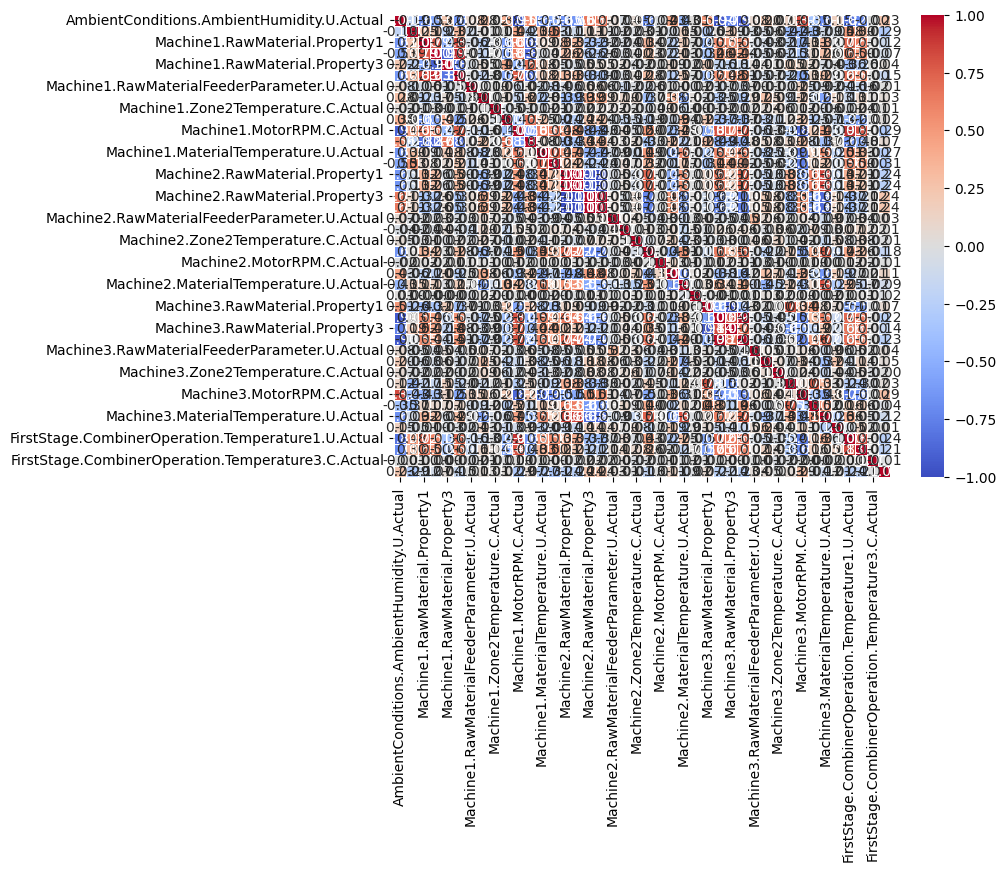

In [ ]:
plt.figure(figsize=(8, 6))  # 그림 크기 조절 (선택사항)
sns.heatmap(a.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

<Axes: >

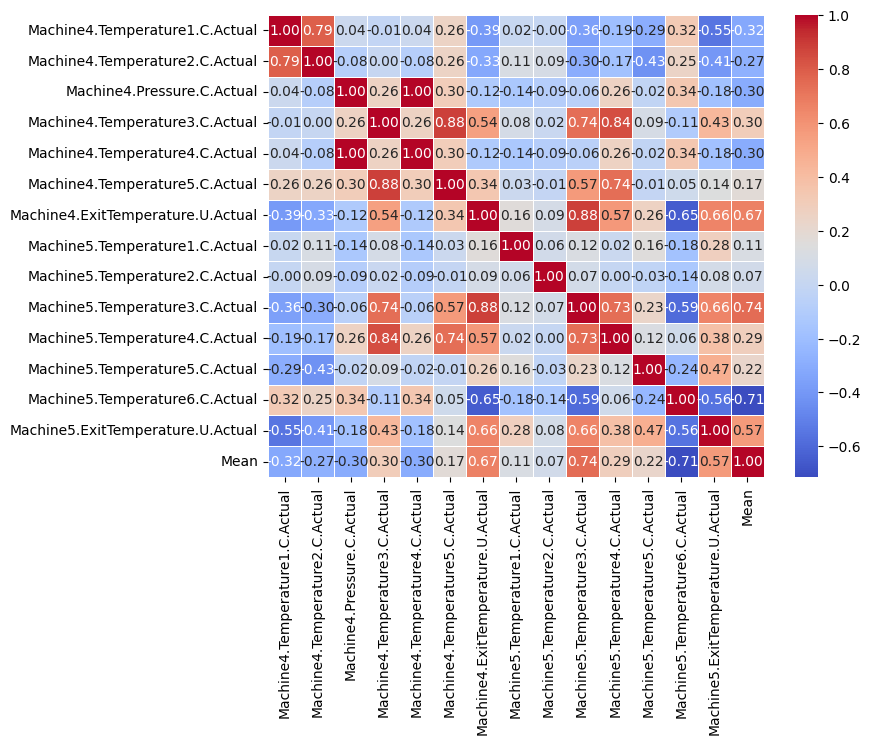

In [ ]:
plt.figure(figsize=(8, 6))  # 그림 크기 조절 (선택사항)
sns.heatmap(b.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [ ]:
# 각 feature와 'Mean' 사이의 상관계수를 계산
correlation_with_mean = a.corrwith(a['Mean']).drop('Mean')

# 상관계수를 절대값 기준으로 내림차순 정렬
sorted_correlation_with_mean = correlation_with_mean.abs().sort_values(ascending=False)

# 유의미한 상관계수를 가진 feature만 선택
heatmapX1 = sorted_correlation_with_mean[sorted_correlation_with_mean > 0.05].index.tolist()
sorted_correlation_with_mean, heatmapX1

(Machine1.ExitZoneTemperature.C.Actual                 0.306309
 AmbientConditions.AmbientTemperature.U.Actual         0.293600
 Machine1.MotorRPM.C.Actual                            0.289938
 Machine3.MotorRPM.C.Actual                            0.288466
 Machine1.MaterialTemperature.U.Actual                 0.266884
 FirstStage.CombinerOperation.Temperature1.U.Actual    0.236770
 Machine2.RawMaterial.Property1                        0.236177
 Machine2.RawMaterial.Property4                        0.236177
 Machine2.RawMaterial.Property3                        0.236177
 Machine2.RawMaterial.Property2                        0.236177
 AmbientConditions.AmbientHumidity.U.Actual            0.234162
 Machine3.RawMaterial.Property4                        0.232059
 Machine3.RawMaterial.Property2                        0.220689
 FirstStage.CombinerOperation.Temperature2.U.Actual    0.205792
 Machine2.MotorAmperage.U.Actual                       0.177666
 Machine1.RawMaterial.Property4         

In [ ]:
# 각 feature와 'Mean' 사이의 상관계수를 계산
correlation_with_mean = b.corrwith(b['Mean']).drop('Mean')

# 상관계수를 절대값 기준으로 내림차순 정렬
sorted_correlation_with_mean = correlation_with_mean.abs().sort_values(ascending=False)

# 유의미한 상관계수를 가진 feature만 선택
heatmapX2 = sorted_correlation_with_mean[sorted_correlation_with_mean > 0.05].index.tolist()
sorted_correlation_with_mean, heatmapX2

(Machine5.Temperature3.C.Actual       0.740297
 Machine5.Temperature6.C.Actual       0.713731
 Machine4.ExitTemperature.U.Actual    0.666665
 Machine5.ExitTemperature.U.Actual    0.568469
 Machine4.Temperature1.C.Actual       0.323936
 Machine4.Pressure.C.Actual           0.302047
 Machine4.Temperature4.C.Actual       0.302047
 Machine4.Temperature3.C.Actual       0.298211
 Machine5.Temperature4.C.Actual       0.285552
 Machine4.Temperature2.C.Actual       0.272453
 Machine5.Temperature5.C.Actual       0.223511
 Machine4.Temperature5.C.Actual       0.172937
 Machine5.Temperature1.C.Actual       0.113391
 Machine5.Temperature2.C.Actual       0.066119
 dtype: float64,
 ['Machine5.Temperature3.C.Actual',
  'Machine5.Temperature6.C.Actual',
  'Machine4.ExitTemperature.U.Actual',
  'Machine5.ExitTemperature.U.Actual',
  'Machine4.Temperature1.C.Actual',
  'Machine4.Pressure.C.Actual',
  'Machine4.Temperature4.C.Actual',
  'Machine4.Temperature3.C.Actual',
  'Machine5.Temperature4.C.Actual',

# 모델 1

In [ ]:
# train_data 설정
filteredX1 = data[heatmapX1]
filteredX2= data[heatmapX2]
train_X1, val_X1, train_Y1, val_Y1 = train_test_split(filteredX1, y1, test_size = 0.1 , random_state =152)
train_X2, val_X2, train_Y2, val_Y2 = train_test_split(filteredX2, y2, test_size = 0.1 , random_state =152)

In [ ]:
#RobustScaler
from sklearn.preprocessing import RobustScaler # 로버스트 스케일러
scaler1 =RobustScaler()
scaled_train_X1 =scaler1.fit_transform(train_X1)
scaled_val_X1 =scaler1.transform(val_X1)
scaler2 =RobustScaler()
scaled_train_X2 =scaler2.fit_transform(train_X2)
scaled_val_X2 =scaler2.transform(val_X2)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score

# LightGBM 모델 설정
lgb_model1 = lgb.LGBMRegressor(objective='regression')  # 회귀 모델 설정
multi_lgb1 = MultiOutputRegressor(lgb_model1)  # 멀티 아웃풋 사용
cv_multi_lgb1 = cross_val_score(multi_lgb1,scaled_train_X1, train_Y1, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("LIGHTGBM 교차 검증 점수:", cv_multi_lgb1)
# 모델 학습
multi_lgb1.fit(scaled_train_X1, train_Y1)

# 모델 예측
predLG1 = multi_lgb1.predict(scaled_val_X1)

# 모델 평가
LGB1_score = r2_score(val_Y1, predLG1)
print("LGB1 R2는:", LGB1_score)

# XGBOOST 모델 설정
xg_model1 = XGBRegressor(objective='reg:squarederror')  # 회귀 모델 설정
multi_xg1 = MultiOutputRegressor(xg_model1)  # 멀티 아웃풋 사용
cv_multi_xg1 = cross_val_score(multi_xg1, scaled_train_X1, train_Y1, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("XGBOOST 교차 검증 점수:", cv_multi_xg1)
# 모델 학습
multi_xg1.fit(scaled_train_X1, train_Y1)

# 모델 예측
predXG1 = multi_xg1.predict(scaled_val_X1)

# 모델 평가
XG1_score = r2_score(val_Y1, predXG1)
print("XGB1 R2는:", XG1_score)

# RandomForest
rf_model1 = RandomForestRegressor()
rf_model1.fit(scaled_train_X1, train_Y1)
cv_rf_model1 = cross_val_score(rf_model1, scaled_train_X1, train_Y1, cv=5, scoring='r2')  # X는 입력 데이터, y는 타겟 데이터
print("랜덤포레스트 교차 검증 점수:", cv_rf_model1)
predRF1 = rf_model1.predict(scaled_val_X1)
RF1_score = r2_score(val_Y1, predRF1)
print("RF1 R2는:", RF1_score)

# ExtraTrees
ef_model1 = ExtraTreesRegressor()
ef_model1.fit(scaled_train_X1, train_Y1)
cv_ef_model1 = cross_val_score(ef_model1, scaled_train_X1, train_Y1, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("엑스트라포레스트 교차 검증 점수:", cv_ef_model1)
predEF1 = ef_model1.predict(scaled_val_X1)
EF1_score = r2_score(val_Y1, predEF1)
print("EF1 R2는:", EF1_score)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 8114, number of used features: 24
[LightGBM] [Info] Start training from score 12.893601
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 8114, number of used features: 24
[LightGBM] [Info] Start training from score 8.132771
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 8114, number of used features: 24
[LightGBM] [Info] St

In [ ]:
#교차검증 점수의  R2스코어, 평균

print("교차검증 점수는")
(LGB1_score,cv_multi_lgb1.mean()), (XG1_score,cv_multi_xg1.mean()), (RF1_score,cv_rf_model1.mean()), (EF1_score,cv_ef_model1.mean())

교차검증 점수는


((0.6087098588590102, 0.620044929877512),
 (0.6017222050667814, 0.5948857071107817),
 (0.6168634747104492, 0.6361802336549272),
 (0.656682281728751, 0.6687966448485836))

In [ ]:
# Model1 에서는엑스트라 Tree가 가장 높게 나타났다.

In [ ]:
# Model1에서 Feature_importances_ 뽑아내기

In [ ]:
# 각 출력(추정자)에 대한 특성 중요도를 저장할 리스트
output_feature_importances = []

# 각 출력(추정자)에 대한 특성 중요도를 계산하고 저장
ef_model1.feature_importances_

#output_feature_importances 에 저장
for feature in ef_model1.feature_importances_:
  output_feature_importances.append(feature)
output_feature_importances
# Pandas 객체로 변환
firstFeatures_df =pd.DataFrame(output_feature_importances)
firstFeatures_df.index = train_X1.columns
firstFeatures_df.columns = ["중요도"]
firstFeatures_df=firstFeatures_df[firstFeatures_df>0.01].dropna()
Stage1_features=firstFeatures_df.index.tolist()
len(Stage1_features)

21

In [ ]:
Stage1_features

['Machine1.ExitZoneTemperature.C.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine3.MotorRPM.C.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'FirstStage.CombinerOperation.Temperature1.U.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property2',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'Machine3.RawMaterial.Property4',
 'Machine3.RawMaterial.Property2',
 'FirstStage.CombinerOperation.Temperature2.U.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine3.RawMaterial.Property3',
 'Machine3.MaterialTemperature.U.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine3.RawMaterial.Property1',
 'Machine1.MaterialPressure.U.Actual']

# 모델 2

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score

# LightGBM 모델 설정
lgb_model2 = lgb.LGBMRegressor(objective='regression')  # 회귀 모델 설정
multi_lgb2 = MultiOutputRegressor(lgb_model2)  # 멀티 아웃풋 사용

# 모델 학습
multi_lgb2.fit(scaled_train_X2, train_Y2)
cv_multi_lgb2 = cross_val_score(multi_lgb2,scaled_train_X2, train_Y2, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("LIGHTGBM 교차 검증 점수:", cv_multi_lgb2)
# 모델 예측
predLG2 = multi_lgb2.predict(scaled_val_X2)

# 모델 평가
LGB2_score = r2_score(val_Y2, predLG2)
print("LGB1 R2는:", LGB2_score)

# XGBOOST 모델 설정
xg_model2 = XGBRegressor(objective='reg:squarederror')  # 회귀 모델 설정
multi_xg2 = MultiOutputRegressor(xg_model2)  # 멀티 아웃풋 사용

# 모델 학습
multi_xg2.fit(scaled_train_X2, train_Y2)
cv_multi_xg2 = cross_val_score(multi_xg2,scaled_train_X2, train_Y2, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("XGBOOST 교차 검증 점수:", cv_multi_xg2)
# 모델 예측
predXG2 = multi_xg2.predict(scaled_val_X2)

# 모델 평가
XG2_score = r2_score(val_Y2, predXG2)
print("XGB1 R2는:", XG2_score)

# RandomForest
rf_model2 = RandomForestRegressor()
rf_model2.fit(scaled_train_X2, train_Y2)
cv_rf_model2 = cross_val_score(rf_model2,scaled_train_X2, train_Y2, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("RandomForest 교차 검증 점수:", cv_multi_lgb2)

predRF2 = rf_model2.predict(scaled_val_X2)
RF2_score = r2_score(val_Y1, predRF2)
print("RF1 R2는:", RF2_score)


# ExtraTrees
ef_model2 = ExtraTreesRegressor()
ef_model2.fit(scaled_train_X2, train_Y2)
cv_ef_model2 = cross_val_score(ef_model2,scaled_train_X2, train_Y2, cv=5)  # X는 입력 데이터, y는 타겟 데이터
print("ExtraForest 교차 검증 점수:", cv_ef_model2)
predEF2 = ef_model2.predict(scaled_val_X2)
EF2_score = r2_score(val_Y2, predEF2)
print("EF1 R2는:", EF2_score)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 10143, number of used features: 14
[LightGBM] [Info] Start training from score 11.704992
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 10143, number of used features: 14
[LightGBM] [Info] Start training from score 6.257647
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [ ]:
print("교차검증 점수는")
(LGB2_score,cv_multi_lgb2.mean()), (XG2_score,cv_multi_xg2.mean()), (RF2_score,cv_rf_model2.mean()), (EF2_score,cv_ef_model2.mean())

교차검증 점수는


((0.7615226882415281, 0.7318969239118959),
 (0.7361005315050717, 0.6987010260007688),
 (-7.744216418866909, 0.7165757085857443),
 (0.6892492433767391, 0.6813257629703384))

In [ ]:
# 각 출력(추정자)에 대한 특성 중요도를 저장할 리스트
output_feature_importances = []

# 각 출력(추정자)에 대한 특성 중요도를 계산하고 저장
for model in multi_lgb2.estimators_:
    feature_importance = model.feature_importances_
    output_feature_importances.append(feature_importance)

# 각 출력(추정자)의 특성 중요도를 출력
for output_index, feature_importance in enumerate(output_feature_importances):
    print(f"Output {output_index + 1} Feature Importance:")
    for feature_index, importance in enumerate(feature_importance):
        print(f"Feature {filteredX1.columns[feature_index]}: {importance}")
    print()

# 각 특성의 중요도를 열별로 더한 후 평균 계산
average_feature_importance = np.mean(output_feature_importances, axis=0)

# 각 특성의 평균 중요도 출력
print("Average Feature Importance:")
for feature_index, importance in enumerate(average_feature_importance):
    print(f"Feature {train_X2.columns[feature_index]}: {importance/15}")

Output 1 Feature Importance:
Feature Machine1.ExitZoneTemperature.C.Actual: 179
Feature AmbientConditions.AmbientTemperature.U.Actual: 278
Feature Machine1.MotorRPM.C.Actual: 306
Feature Machine3.MotorRPM.C.Actual: 811
Feature Machine1.MaterialTemperature.U.Actual: 103
Feature FirstStage.CombinerOperation.Temperature1.U.Actual: 193
Feature Machine2.RawMaterial.Property1: 0
Feature Machine2.RawMaterial.Property4: 161
Feature Machine2.RawMaterial.Property3: 470
Feature Machine2.RawMaterial.Property2: 159
Feature AmbientConditions.AmbientHumidity.U.Actual: 39
Feature Machine3.RawMaterial.Property4: 152
Feature Machine3.RawMaterial.Property2: 37
Feature FirstStage.CombinerOperation.Temperature2.U.Actual: 112

Output 2 Feature Importance:
Feature Machine1.ExitZoneTemperature.C.Actual: 259
Feature AmbientConditions.AmbientTemperature.U.Actual: 284
Feature Machine1.MotorRPM.C.Actual: 422
Feature Machine3.MotorRPM.C.Actual: 703
Feature Machine1.MaterialTemperature.U.Actual: 115
Feature FirstSt

In [ ]:
'''
Average Feature Importance:
Feature Machine5.Temperature3.C.Actual: 19.875555555555554
Feature Machine5.Temperature6.C.Actual: 14.551111111111112
Feature Machine4.ExitTemperature.U.Actual: 27.022222222222222
Feature Machine5.ExitTemperature.U.Actual: 52.11111111111111
Feature Machine4.Temperature1.C.Actual: 7.488888888888889
Feature Machine4.Pressure.C.Actual: 8.2
Feature Machine4.Temperature4.C.Actual: 0.0
Feature Machine4.Temperature3.C.Actual: 10.204444444444444
Feature Machine5.Temperature4.C.Actual: 27.684444444444445
Feature Machine4.Temperature2.C.Actual: 9.906666666666666
Feature Machine5.Temperature5.C.Actual: 4.568888888888889
Feature Machine4.Temperature5.C.Actual: 9.511111111111111
Feature Machine5.Temperature1.C.Actual: 3.097777777777778
Feature Machine5.Temperature2.C.Actual: 5.777777777777778

# 중요도로 판단한 Stage2_Features =
[Machine5.Temperature3.C.Actual,Machine5,
Temperature6.C.Actual,
Machine4.ExitTemperature.U.Actual,
Machine5.ExitTemperature.U.Actual,
Machine4.Temperature1.C.Actual,
Machine4.Pressure.C.Actual,
Machine4.Temperature3.C.Actual,
Machine5.Temperature4.C.Actual,
Machine4.Temperature2.C.Actual,
Machine5.Temperature5.C.Actual,
Machine4.Temperature5.C.Actual,
Machine5.Temperature1.C.Actual,
Machine5.Temperature2.C.Actual]








'''

'\nAverage Feature Importance:\nFeature Machine5.Temperature3.C.Actual: 19.875555555555554\nFeature Machine5.Temperature6.C.Actual: 14.551111111111112\nFeature Machine4.ExitTemperature.U.Actual: 27.022222222222222\nFeature Machine5.ExitTemperature.U.Actual: 52.11111111111111\nFeature Machine4.Temperature1.C.Actual: 7.488888888888889\nFeature Machine4.Pressure.C.Actual: 8.2\nFeature Machine4.Temperature4.C.Actual: 0.0\nFeature Machine4.Temperature3.C.Actual: 10.204444444444444\nFeature Machine5.Temperature4.C.Actual: 27.684444444444445\nFeature Machine4.Temperature2.C.Actual: 9.906666666666666\nFeature Machine5.Temperature5.C.Actual: 4.568888888888889\nFeature Machine4.Temperature5.C.Actual: 9.511111111111111\nFeature Machine5.Temperature1.C.Actual: 3.097777777777778\nFeature Machine5.Temperature2.C.Actual: 5.777777777777778\n\n# 중요도로 판단한 Stage2_Features =\n[Machine5.Temperature3.C.Actual,Machine5,\nTemperature6.C.Actual,\nMachine4.ExitTemperature.U.Actual,\nMachine5.ExitTemperature.U.A

# 제출

In [ ]:
# 무지성 제출해보자
testX1 = sub[heatmapX1]
testX2 = sub[heatmapX2]
# 테스트에도 RobustScaler 적용

In [ ]:
from sklearn.preprocessing import RobustScaler # 로버스트 스케일러
scaled_testX1=scaler1.transform(testX1)
scaled_testX2=scaler2.transform(testX2)

In [ ]:
Stage1 = ef_model1.predict(scaled_testX1)
Stage2 = multi_lgb2.predict(scaled_testX2)

In [ ]:
# 훈련 데이터
# X1_selected ,y1
# X2_selected, y2
# 테스트 데이터
# Sub1_selected
# Sub2_selected

In [ ]:
from sklearn.preprocessing import RobustScaler # 로버스트 스케일러
scaler1 =RobustScaler()
scaler2 =RobustScaler()
scaled_train_X1 =scaler1.fit_transform(X1_selected)
scaled_val_X1 =scaler1.transform(Sub1_selected)

scaled_train_X2 =scaler2.fit_transform(X2_selected)
scaled_val_X2 =scaler2.transform(Sub2_selected)

In [ ]:
#1번은 ExtraTree
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.multioutput import MultiOutputRegressor # 다항 회귀
import lightgbm as lgb
etr_model = etr()
etr_model.fit(scaled_train_X1,y1)
Stage1 =etr_model.predict(scaled_val_X1)
#2번은 Lgbm
# LightGBM 모델 설정
lgb_final = lgb.LGBMRegressor(objective='regression')  # 회귀 모델 설정
multi_final = MultiOutputRegressor(lgb_final)  # 멀티 아웃풋 사용
multi_final.fit(scaled_train_X2, y2)
Stage2 =multi_final.predict(scaled_val_X2)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 11270, number of used features: 13
[LightGBM] [Info] Start training from score 11.702517
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 11270, number of used features: 13
[LightGBM] [Info] Start training from score 6.255836
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [ ]:
from sklearn.preprocessing import RobustScaler # 로버스트 스케일러
scaler1 =RobustScaler()
scaler2 =RobustScaler()
scaled_train_X1 =scaler1.fit_transform(X1_selected)
scaled_val_X1 =scaler1.transform(Sub1_selected)

scaled_train_X2 =scaler2.fit_transform(X2_selected)
scaled_val_X2 =scaler2.transform(Sub2_selected)

In [ ]:
#1번은 ExtraTree
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.multioutput import MultiOutputRegressor # 다항 회귀
import lightgbm as lgb
etr_model = etr()
etr_model.fit(scaled_train_X1,y1)
Stage1 =etr_model.predict(scaled_val_X1)
#2번은 Lgbm
# LightGBM 모델 설정
lgb_final = lgb.LGBMRegressor(objective='regression')  # 회귀 모델 설정
multi_final = MultiOutputRegressor(lgb_final)  # 멀티 아웃풋 사용
multi_final.fit(scaled_train_X2, y2)
Stage2 =multi_final.predict(scaled_val_X2)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 11270, number of used features: 13
[LightGBM] [Info] Start training from score 11.702517
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 11270, number of used features: 13
[LightGBM] [Info] Start training from score 6.255836
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [ ]:
np.save("submission1.npy", Stage1)
np.save("submission2.npy",Stage2)

In [ ]:
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload
# 제출 파일 업로드
await upload()

# 채점 수행
await check_score()

In [ ]:
# 머신러닝